# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [151]:
USER_NAME = u"Щербакова".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L1 регуляризацией с помощью метода  Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [98]:
from sklearn.base import BaseEstimator, ClassifierMixin
from random import randint
from sklearn.metrics import accuracy_score
import random

def yhat(x, theta):
    return float(1) / (1 + np.exp(-x.dot(theta))) if -100. < x.dot(theta) else (0.0)

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        #X = np.c_[X, np.ones(len(X[:, 1]))]
        X = np.concatenate ((X, np.ones((X.shape[0],1))), axis=1)
        Betas = []
        cost = []
        coef = [0.0 for i in range(len(X[0]))]
        for epoch in range(self.max_epoch):
            epoch = epoch + 1
            #chosenObj = randint(0, len(X[:, 0]) - 1)
            shuffled = random.sample (range(X.shape[0]), X.shape[0])
            #for i in range(len(X[0])):
                #coef[i] = coef[i] - self.alpha * ((yhat(X[chosenObj], coef) - y[chosenObj])*X[chosenObj, i] + self.C*np.sign(X[chosenObj, i]))
            for iteration, i in enumerate (shuffled):
                coef = coef - (self.alpha / epoch) * (yhat(X[i], coef) - y[i])*X[i]
                coef = coef + (self.alpha / epoch)*self.C*np.sign(coef)
            y_appr = []
            for x in X:
                y_appr.append(round(yhat(x, coef)))
            Betas.append(coef[:])
            # считаем ошибку и значение функции потерь
            error = (y_appr - y)
            cost.append(((np.sum(error ** 2) + np.sum(np.abs(coef)))/float(2 * len(X[:, 1]))))
            #cost.append(accuracy_score(y, y_appr))
            
        self.coefficients_sgd = coef
        self.cost = cost
        self.Betas = Betas
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        X = np.concatenate ((X, np.ones((X.shape[0],1))), axis=1)

        y_hat = list()
        
        coef = self.coefficients_sgd
        for x in X:
            y_hat.append(round(yhat(x, coef)))
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        X = np.concatenate ((X, np.ones((X.shape[0],1))), axis=1)
        
        y_hat_proba = list()        
        coef = self.coefficients_sgd
        for x in X:
            y_hat_proba.append((yhat(x, coef)))
        
        
        return y_hat_proba

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

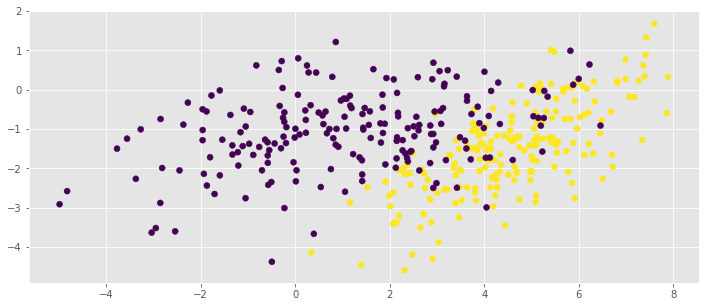

In [71]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [72]:
model = MySGDClassifier(C = 0.01, max_epoch=20)
model.fit(X, y)

MySGDClassifier(C=0.01, alpha=0.01, max_epoch=20)

In [74]:
## Your Code Here

model.predict_proba(X)
from sklearn.metrics import accuracy_score

accuracy_score(y, model.predict(X))

0.82999999999999996

In [75]:
model.coefficients_sgd

array([ 0.52830484, -0.27698743, -1.53317102])

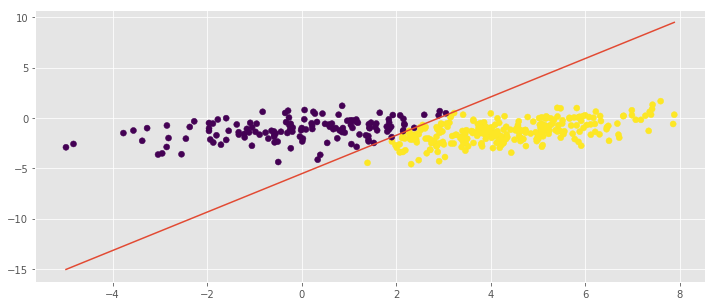

In [76]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

X_full = np.c_[X, np.ones(400)]
X_1 = np.sort(X, axis=0)

plt.plot(X_1[:,0], (-model.coefficients_sgd[2] - model.coefficients_sgd[0]* X_1[:,0])/model.coefficients_sgd[1])


## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

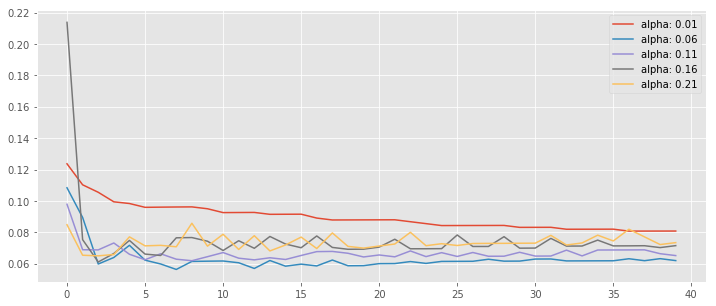

In [79]:
for alpha in np.arange (0.01, 0.25, 0.05):
    model = MySGDClassifier(alpha=alpha, max_epoch=40, C=0.01)
    model.fit(X, y)
    plt.plot (model.cost, label='alpha: ' + str(alpha))
plt.legend ()

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [80]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))

# df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [81]:
df_data.shape

(500000, 45)

In [82]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [83]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [84]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.504702

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [85]:
## Youd Code Here
## Youd Code Here
opponent_unique_cards = df_data.opponent_hero_card_id.unique ()
player_unique_cards = df_data.player_hero_card_id.unique ()

print "amount of unique opponent cards: ", len (opponent_unique_cards)
print "amount of unique player cards: ", len (player_unique_cards)

amount of unique opponent cards:  9
amount of unique player cards:  9


In [86]:
cols_to_transform = [ 'player_hero_card_id', 'opponent_hero_card_id']
df_with_dummies = pd.get_dummies(data = df_data, columns = cols_to_transform, prefix=['player_hero_card_id', 'opponent_hero_card_id'])

df_with_dummies.head ().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1
opponent_deck_count,11,19,22,17,12


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [100]:
## Youd Code Here
## Youd Code Here
X = df_with_dummies.drop ('decision', axis=1)
y = df_with_dummies.decision.values

model = MySGDClassifier(alpha=0.1, max_epoch=10, C=0.01)
model.fit (X, y)


MySGDClassifier(C=0.01, alpha=0.1, max_epoch=10)

In [101]:
model.coefficients_sgd

array([  6.59934876e+01,  -3.15229201e+00,   7.97543315e+00,
        -2.57058214e+00,  -3.30232710e+01,  -2.05357892e+01,
        -2.60859868e+01,  -1.61972390e+00,   2.45318544e+01,
        -1.18206485e+03,  -2.98258162e+00,   4.56230220e+00,
         3.52017465e+00,  -7.90436620e+00,   2.18043160e+00,
        -2.25076445e+01,   2.30157719e+01,   2.16211829e+01,
         2.09598403e+00,   2.56367156e+01,   1.31984746e+03,
         8.27897693e+02,  -4.59784828e+00,   4.56230220e+00,
        -5.33716097e+00,  -1.64508958e+00,  -6.03887081e+00,
         4.66109622e+00,  -4.59784828e+00,   1.36489989e+00,
         2.85108395e+00,   2.43194159e+00,   1.31929689e+00,
        -1.64034486e+03,  -1.63735750e+03,  -1.64150046e+03,
         8.27897693e+02,  -6.79998067e+00,   6.58480354e-01,
        -1.54133165e+00,   1.15835982e+00,   1.18750104e+03,
         1.21258498e+03,   1.23206343e+03,   1.20931528e+03,
         1.19909594e+03,   1.21728637e+03,   1.20750290e+03,
         1.19348686e+03,

## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [102]:
## Youd Code Here
## Youd Code Here
filepath = 'testData_tabular.csv'
df_test_data = pd.read_csv(filepath, sep=',')
df_test_data.shape

(750000, 45)

In [103]:
df_test_data.columns = df_test_data.columns.str.replace('.', '_')
df_test_data = df_test_data.set_index('gamestate_id')

In [104]:
df_test_data.head().T

gamestate_id,6845857.0,9279433.0,6642076.0,9169516.0,8991397.0
decision,NaN,NaN,NaN,NaN,NaN
turn,12.0,6.0,14.0,7.0,9.0
opponent_armor,0.0,0.0,0.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0
opponent_hero_card_id,798.0,326.0,390.0,798.0,326.0
opponent_hp,29.0,12.0,12.0,30.0,30.0
opponent_special_skill_used,1.0,0.0,0.0,0.0,1.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent_crystals_all,10.0,5.0,10.0,6.0,8.0
opponent_crystals_current,8.0,5.0,0.0,6.0,2.0


In [105]:
cols_to_transform = [ 'player_hero_card_id', 'opponent_hero_card_id']
df_with_dummies_test = pd.get_dummies(data = df_test_data, columns = cols_to_transform, prefix=['player_hero_card_id', 'opponent_hero_card_id'])

df_with_dummies_test.head ().T

gamestate_id,6845857.0,9279433.0,6642076.0,9169516.0,8991397.0
decision,NaN,NaN,NaN,NaN,NaN
turn,12.0,6.0,14.0,7.0,9.0
opponent_armor,0.0,0.0,0.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0
opponent_hp,29.0,12.0,12.0,30.0,30.0
opponent_special_skill_used,1.0,0.0,0.0,0.0,1.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent_crystals_all,10.0,5.0,10.0,6.0,8.0
opponent_crystals_current,8.0,5.0,0.0,6.0,2.0
opponent_deck_count,16.0,22.0,11.0,20.0,19.0


In [106]:
X_test = df_with_dummies_test.drop ('decision', axis=1)

prob_vec = model.predict_proba(X_test)
prob_vec

[1.0,
 1.0,
 1.0,
 0.00015746920838396225,
 0.26617187710846069,
 6.7764280151933054e-17,
 1.0,
 1.0,
 1.0,
 9.7118067386552574e-20,
 0.99999999998852229,
 1.0,
 1.0,
 0.00039550595951663985,
 1.0,
 1.0,
 1.0,
 1.0,
 0.91568916929416955,
 0.30111209982739912,
 1.0,
 0.99999994571216944,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 8.1507810708293427e-08,
 1.0,
 1.0,
 1.0,
 0.99999999971622744,
 1.0,
 1.0,
 1.0,
 1.0,
 7.2648617649428522e-06,
 1.0,
 1.0,
 0.00048244474835794875,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.922142291705988e-25,
 1.0,
 1.0,
 1.0,
 5.9273685014460525e-17,
 0.99999944832919463,
 1.0,
 1.0,
 1.0,
 2.7676162175799624e-24,
 1.0,
 1.5002597556909136e-05,
 1.0,
 0.77348948599533707,
 5.8701440700700766e-17,
 1.0,
 0.10619190238709784,
 1.0,
 1.0,
 1.0,
 0.99999999999995182,
 0.99999999999976041,
 1.0,
 1.4276740787291314e-13,
 1.0,
 4.0786522467653673e-05,
 5.4675854957217328e-07,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999999999981215,
 1.0727624966094636e-16,
 1.0,
 0.99999999999999978,
 1.0,
 1.